In [32]:
# Imports
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

Diabetes_012 class types:
- 0 is for no diabetes or only during pregnancy
- 1 is for prediabetes
- 2 is for diabetes.

In [33]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [34]:
# Separate features and target
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train the decision tree using entropy as the criterion and a max depth of 5
clf_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf_entropy_5.fit(X_train, y_train)

# Predict and evaluate the results
y_entropy_5 = clf_entropy_5.predict(X_test)
print(classification_report(y_test, y_entropy_5))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91     38116
         1.0       0.00      0.00      0.00       906
         2.0       0.55      0.13      0.21      6935

    accuracy                           0.83     45957
   macro avg       0.47      0.37      0.37     45957
weighted avg       0.78      0.83      0.79     45957



/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [36]:
# Train the decision tree using entropy as the criterion and a max depth of 5
clf_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_gini_5.fit(X_train, y_train)

# Predict and evaluate the results
y_gini_5 = clf_gini_5.predict(X_test)
print(classification_report(y_test, y_gini_5))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     38116
         1.0       0.00      0.00      0.00       906
         2.0       0.57      0.12      0.19      6935

    accuracy                           0.83     45957
   macro avg       0.47      0.37      0.37     45957
weighted avg       0.78      0.83      0.78     45957



/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

We can see that using the decision tree with criterion set to entropy and gini with a max tree depth of 5 will be unable to predict class 1 (pre-prediabetes). Let's try the following:
1. No max depth set
2. Max depth of 50

In [37]:
# Train the decision tree using entropy as the criterion and no max depth
clf_entropy_5 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_5.fit(X_train, y_train)

# Predict and evaluate the results
y_entropy_5 = clf_entropy_5.predict(X_test)
print(classification_report(y_test, y_entropy_5))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     38116
         1.0       0.03      0.04      0.04       906
         2.0       0.29      0.31      0.30      6935

    accuracy                           0.75     45957
   macro avg       0.39      0.40      0.40     45957
weighted avg       0.76      0.75      0.75     45957



In [38]:
# Train the decision tree using entropy as the criterion and no max depth
clf_gini_5 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_5.fit(X_train, y_train)

# Predict and evaluate the results
y_gini_5 = clf_gini_5.predict(X_test)
print(classification_report(y_test, y_gini_5))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85     38116
         1.0       0.02      0.02      0.02       906
         2.0       0.28      0.32      0.30      6935

    accuracy                           0.74     45957
   macro avg       0.39      0.39      0.39     45957
weighted avg       0.76      0.74      0.75     45957



In [39]:
# Train the decision tree using entropy as the criterion and max depth 50
clf_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)
clf_entropy_5.fit(X_train, y_train)

# Predict and evaluate the results
y_entropy_5 = clf_entropy_5.predict(X_test)
print(classification_report(y_test, y_entropy_5))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     38116
         1.0       0.03      0.04      0.04       906
         2.0       0.29      0.31      0.30      6935

    accuracy                           0.75     45957
   macro avg       0.39      0.40      0.40     45957
weighted avg       0.76      0.75      0.75     45957



In [40]:
# Train the decision tree using entropy as the criterion and max depth 50
clf_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=50, random_state=42)
clf_gini_5.fit(X_train, y_train)

# Predict and evaluate the results
y_gini_5 = clf_gini_5.predict(X_test)
print(classification_report(y_test, y_gini_5))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85     38116
         1.0       0.02      0.02      0.02       906
         2.0       0.28      0.32      0.30      6935

    accuracy                           0.74     45957
   macro avg       0.39      0.39      0.39     45957
weighted avg       0.76      0.74      0.75     45957



Due to how imbalanced this data set is the precision, recall, and f1-score is very low for class 1 and class 2. We can try to improve these results by trying the following:
1. Set class_weight="balanced". This will help give more weight to the imbalanced classes.
2. Try controling the complexity of the decision tree by providing a maximum depth.
3. Set min_samples_leaf, which will help the Decision Tree not overfit to the majority class (class 0, no diabetes)

In [41]:
# Train the decision tree using entropy as the criterion and max depth 50
clf_gini_5 = DecisionTreeClassifier(criterion='gini',  class_weight='balanced', min_samples_leaf=8, max_depth=15, random_state=42)
clf_gini_5.fit(X_train, y_train)

# Predict and evaluate the results
y_gini_5 = clf_gini_5.predict(X_test)
print(classification_report(y_test, y_gini_5))

              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72     38116
         1.0       0.03      0.31      0.06       906
         2.0       0.30      0.54      0.38      6935

    accuracy                           0.57     45957
   macro avg       0.42      0.48      0.39     45957
weighted avg       0.82      0.57      0.66     45957



In [42]:
# Train the decision tree using entropy as the criterion and max depth 50
clf_entropy_5 = DecisionTreeClassifier(criterion='entropy',  class_weight='balanced', min_samples_leaf=8, max_depth=50, random_state=42)
clf_entropy_5.fit(X_train, y_train)

# Predict and evaluate the results
y_entropy_5 = clf_entropy_5.predict(X_test)
print(classification_report(y_test, y_entropy_5))

              precision    recall  f1-score   support

         0.0       0.91      0.65      0.75     38116
         1.0       0.03      0.17      0.05       906
         2.0       0.27      0.52      0.36      6935

    accuracy                           0.62     45957
   macro avg       0.40      0.45      0.39     45957
weighted avg       0.79      0.62      0.68     45957



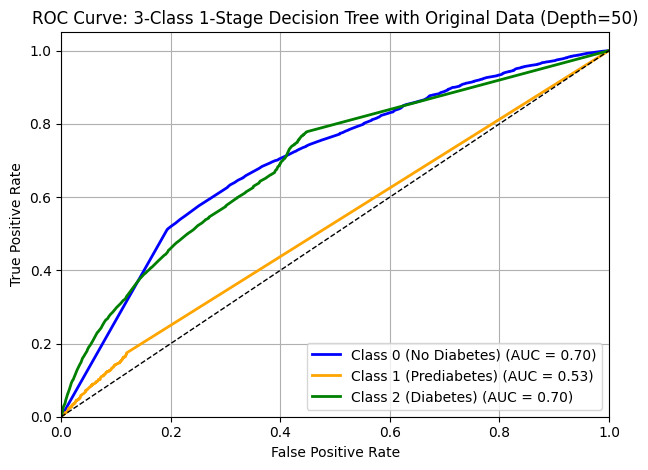

In [43]:
# Predict class probabilities
y_score = clf_entropy_5.predict_proba(X_test)

# Binarize the output labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Plot ROC for all classes
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'orange', 'green']
labels = ['Class 0 (No Diabetes)', 'Class 1 (Prediabetes)', 'Class 2 (Diabetes)']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: 3-Class 1-Stage Decision Tree with Original Data (Depth=50)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

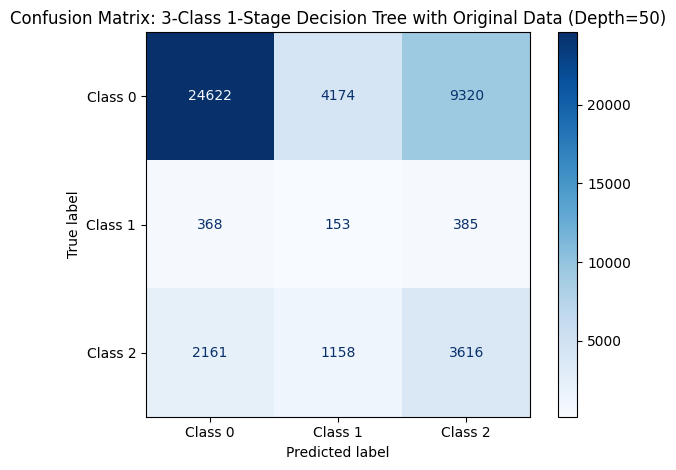

In [44]:
cm = confusion_matrix(y_test, y_entropy_5, labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix: 3-Class 1-Stage Decision Tree with Original Data (Depth=50)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Decision Tree Modeling with a 2-stage classification system

In [45]:
# Merge Class 1 and 2 into single class
y_binary = y.copy()
y_binary[y_binary == 2] = 1

# Split data into training and test data, no standardization needed
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Convert y back to Series
y_train_binary = pd.Series(y_train_binary, index=X_train.index)
y_test_binary = pd.Series(y_test_binary, index=X_test.index)

# Train first Model: 0 vs (1+2)
first_stage_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)
first_stage_tree.fit(X_train, y_train_binary)

# Predict first stage
y_pred_binary = first_stage_tree.predict(X_test)

print("\nFirst Stage Classification Report (class 0 vs class 1+2):")
print(classification_report(y_test_binary, y_pred_binary))

# Predict second stage for class 1 from the binary model, then reclassify into class 1 or class 2

# Find which test samples were predicted as the combined diabetes group
# np.where always returns a tuple, get the 0th index for the actual array
indices_pred_diabetes = np.where(y_pred_binary == 1)[0]

# Subset X_test and original true labels (y_test) to only the samples predicted as diabetes
X_test_diabetes = X_test.iloc[indices_pred_diabetes]
# Backwards translate from binary to the original set
y_test_full = y.iloc[y_test_binary.index]  # Go back to original labels 0/1/2
y_test_diabetes = y_test_full.iloc[indices_pred_diabetes]

# Only keep the real class 1 and 2
X_test_diabetes = X_test_diabetes[(y_test_diabetes == 1) | (y_test_diabetes == 2)]
y_test_diabetes = y_test_diabetes[(y_test_diabetes == 1) | (y_test_diabetes == 2)]

# Train a second model to distinguish 1 vs 2
y_train_full = y.loc[X_train.index]  # Must match original y to X_train
mask_train_diabetes = (y_train_binary == 1)
X_train_diabetes = X_train[mask_train_diabetes]
y_train_diabetes = y_train_full[mask_train_diabetes]

second_stage_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)
second_stage_tree.fit(X_train_diabetes, y_train_diabetes)

# Predict second stage
y_pred_second_stage = second_stage_tree.predict(X_test_diabetes)

print("\nSecond Stage Classification Report (class 1 vs class 2):")
print(classification_report(y_test_diabetes, y_pred_second_stage))

# Reconstruct final prediction array
y_pred_final = y_pred_binary.copy()
pred_diabetes_indices = np.where(y_pred_binary == 1)[0]

# Reindex and assign
y_test_full_diabetes = y_test_full.iloc[pred_diabetes_indices]
valid_indices = pred_diabetes_indices[(y_test_full_diabetes == 1) | (y_test_full_diabetes == 2)]

for i, idx in enumerate(valid_indices):
    y_pred_final[idx] = y_pred_second_stage[i]

print("\nFinal DT Classification Report:")
print(classification_report(y_test_full, y_pred_final))


First Stage Classification Report (class 0 vs class 1+2):
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78     38012
         1.0       0.33      0.76      0.46      7945

    accuracy                           0.69     45957
   macro avg       0.63      0.72      0.62     45957
weighted avg       0.83      0.69      0.72     45957


Second Stage Classification Report (class 1 vs class 2):
              precision    recall  f1-score   support

         1.0       0.14      0.30      0.19       608
         2.0       0.91      0.79      0.85      5437

    accuracy                           0.74      6045
   macro avg       0.52      0.55      0.52      6045
weighted avg       0.83      0.74      0.78      6045


Final DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78     38012
         1.0       0.01      0.19      0.02       958
         2.0       0.91      0.62

# Save final prediction data to results directory to be used in ensemble voting

In [46]:
# Start from binary predictions
y_pred_final = y_pred_binary.copy()

# Get original indices of test set where model predicted diabetes
pred_diabetes_indices = np.where(y_pred_binary == 1)[0]

# Get matching original test set labels
y_test_full = y.iloc[y_test_binary.index]  # back to 0/1/2 labels
y_test_diabetes = y_test_full.iloc[pred_diabetes_indices]

# Only keep samples that are truly class 1 or 2
valid_indices_mask = (y_test_diabetes == 1) | (y_test_diabetes == 2)
final_indices_to_update = pred_diabetes_indices[valid_indices_mask]

# Assign back second-stage predictions
for idx_in_list, idx in enumerate(final_indices_to_update):
    y_pred_final[idx] = y_pred_second_stage[idx_in_list]

# Save predictions
import os
os.makedirs("results", exist_ok=True)
np.save("results/y_pred_dt.npy", y_pred_final)

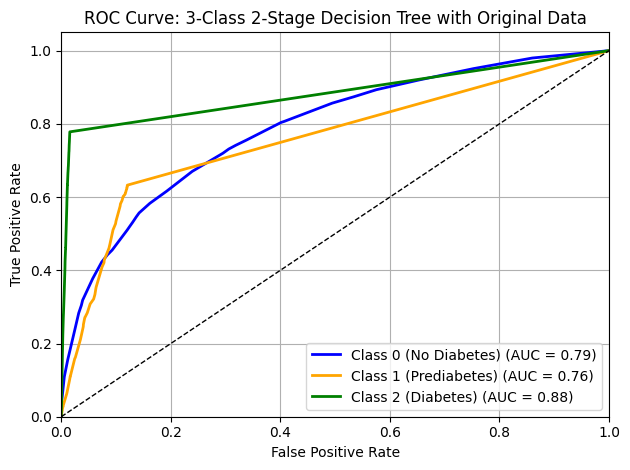

In [47]:
# Get first-stage probabilities
prob_first_stage = first_stage_tree.predict_proba(X_test)[:, 1]

# Get second-stage probabilities
prob_second_stage = second_stage_tree.predict_proba(X_test_diabetes)

# Assemble full probability matrix for classes 0, 1, 2
y_score = np.zeros((len(X_test), 3))
y_score[:, 0] = 1 - prob_first_stage 

# Fill in class 1 and 2 probabilities for relevant samples
for i, global_idx in enumerate(X_test_diabetes.index):
    prob_1 = prob_second_stage[i, 0]
    prob_2 = prob_second_stage[i, 1]
    diabetes_prob = prob_first_stage[X_test.index.get_loc(global_idx)]
    y_score[X_test.index.get_loc(global_idx), 1] = diabetes_prob * prob_1
    y_score[X_test.index.get_loc(global_idx), 2] = diabetes_prob * prob_2

# Binarize the true labels
y_test_bin = label_binarize(y_test_full, classes=[0, 1, 2])

# Plot all ROC cruves
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'orange', 'green']
labels = ['Class 0 (No Diabetes)', 'Class 1 (Prediabetes)', 'Class 2 (Diabetes)']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: 3-Class 2-Stage Decision Tree with Original Data")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

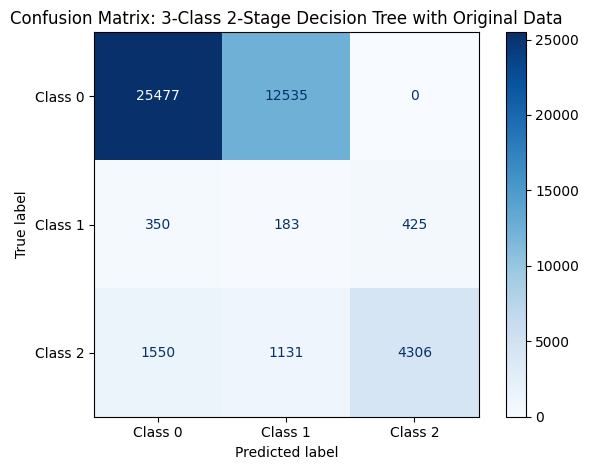

In [48]:
cm = confusion_matrix(y_test_full, y_pred_final, labels=[0, 1, 2])

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix: 3-Class 2-Stage Decision Tree with Original Data")
plt.grid(False)
plt.tight_layout()
plt.show()